1. What is Linear Regression?

Ans. b. A supervised learning algorithm used for regression problems.

2. Which of the following is NOT an assumption of Linear Regression?

Ans.c. Multicollinearity


3. What is Multiple Regression?

Ans . b. A supervised learning algorithm used for regression problems involving multiple independent variables.


4. Which of the following is an advantage of Multiple Regression over Simple Linear Regression?

Ans. a. More accurate predictions

5. What is Polynomial Regression?

Ans. b. A supervised learning algorithm used for regression problems that model the relationship between the response variable and the independent variable as an nth degree polynomial.

6. Which of the following is NOT an assumption of Polynomial Regression?

Ans. a. Linearity

7. What is the coefficient of determination (R-squared) used for in Linear Regression?

Ans. a. To measure the accuracy of the predictions made by the model


8. Which of the following statements is true about Multicollinearity in Multiple Regression?

Ans. b. It can lead to unstable estimates of the regression coefficients.


9. Which of the following statements is true about Overfitting in Polynomial Regression?

Ans. b. It occurs when the model is too complex and fits the noise in the data.


10. Which of the following statements is true about Regularization in Linear Regression?

Ans. a. It is used to reduce the bias of the model. b. It is used to reduce the variance of the model.




11. Which of the following is an example of Linear Regression?

Ans. c. Predicting the price of a house based on its size and location.


**Case Studies based MCQs**

1. A car rental company wants to predict the rental price of its cars based on the age of thecar and the number of miles driven. Which type of regression would be most appropriatefor this problem?

Ans. b. Multiple Regression
     c. Polynomial Regression


2. A clothing retailer wants to predict the sales of its products based on the price of the product and the marketing spend on the product. However, the retailer suspects that there might be a non-linear relationship between the price and the sales. Which type of regression would be most appropriate for this problem?

Ans. c. Polynomial Regression


3. A healthcare provider wants to predict the length of hospital stay for patients based on their age, gender, medical history, and the severity of their illness. However, the provider suspects that there might be a strong correlation between some of the independent variables. Which technique can be used to address this issue?

Ans. a. Multicollinearity


4. A real estate agent wants to predict the selling price of a house based on its location, size, number of bedrooms, and age. However, the agent suspects that the relationship between the independent variables and the dependent variable might not be linear. Which type of regression would be most appropriate for this problem?

Ans. c. Polynomial Regression
     d. Logistic Regression


5. A marketing agency wants to predict the conversion rate of a digital advertising campaign based on the target audience, the ad creative, and the ad spend. However, the agency suspects that there might be interactions between the independent variables. Which technique can be used to address this issue

Ans. 

# Case Study: Predicting House Prices using Multiple Polynomial Regression


In [1]:
#Importing the data
from sklearn.datasets import fetch_california_housing 

In [2]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = fetch_california_housing()

In [4]:
data.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [5]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
# Printing the first 5 rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
# Checking for the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
# The above info shows that there are no null values in the dataframe. 

In [10]:
# Removing unneccesary columns
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [12]:
df["MHV"] = data.target   # MHV -  median house value

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MHV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


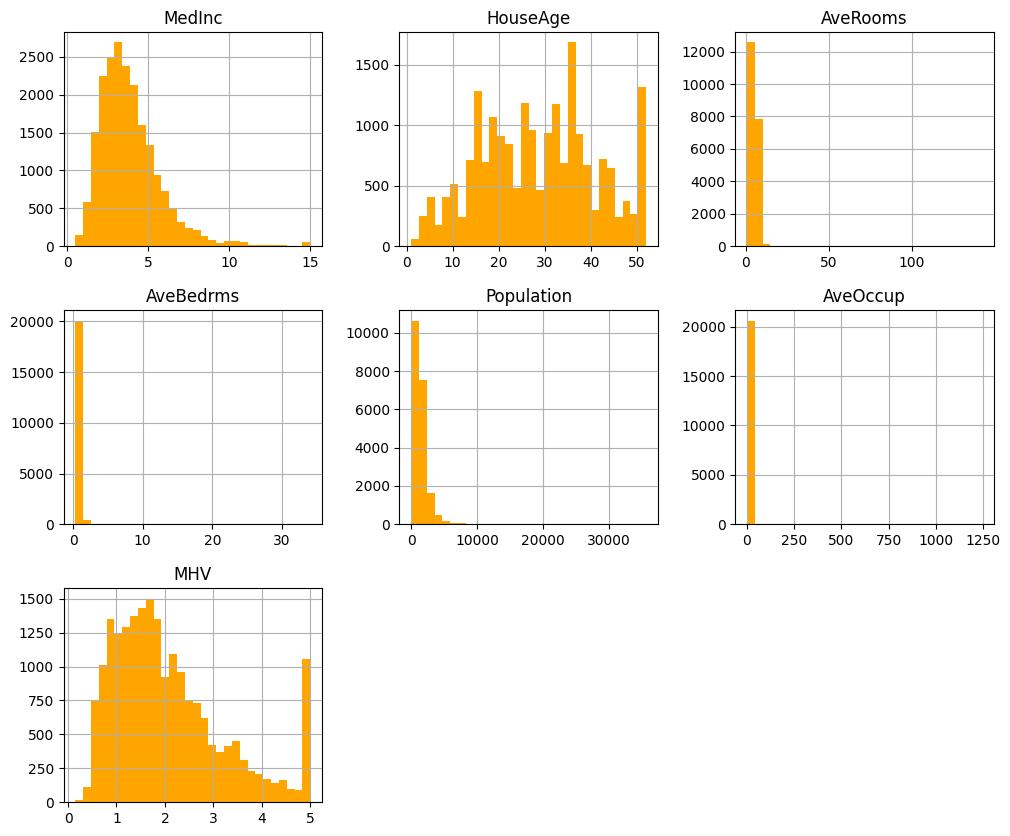

In [14]:
# Histograms of all the features
df.hist(figsize=(12, 10), bins=30, color = "orange")
plt.show()

In [15]:
# Statistical info of numerical columns
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MHV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


<AxesSubplot: >

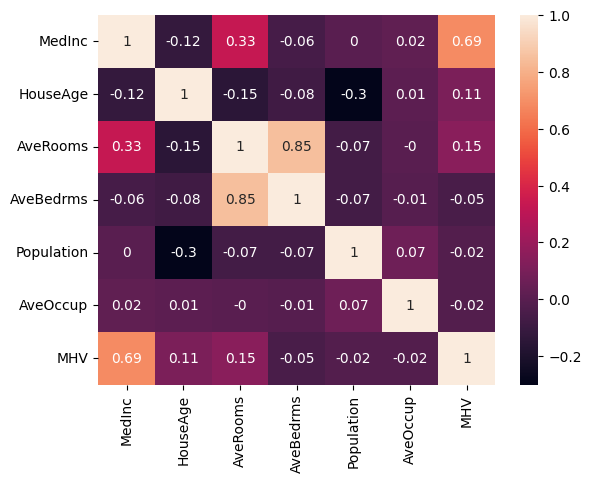

In [16]:
corr = df.corr().round(2)
sns.heatmap(data = corr, annot = True)

In [17]:
# Importing libraries for the regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
X = pd.concat([df['MedInc'],df['HouseAge'],df['AveRooms'],df['AveBedrms'],df['Population']], axis = 1)
Y = data.target

In [19]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population
0,8.3252,41.0,6.984127,1.023810,322.0
1,8.3014,21.0,6.238137,0.971880,2401.0
2,7.2574,52.0,8.288136,1.073446,496.0
3,5.6431,52.0,5.817352,1.073059,558.0
4,3.8462,52.0,6.281853,1.081081,565.0
...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0
20636,2.5568,18.0,6.114035,1.315789,356.0
20637,1.7000,17.0,5.205543,1.120092,1007.0
20638,1.8672,18.0,5.329513,1.171920,741.0


In [20]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [21]:
# Creating test and train data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state =42)

In [23]:
X_train.shape

(16512, 5)

In [24]:
X_test.shape

(4128, 5)

In [25]:
Y_train.shape

(16512,)

In [26]:
Y_test.shape

(4128,)

In [27]:
def polymodel(degree):
    
    poly_feat = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly_feat.fit_transform(X_train)
    X_test_poly = poly_feat.fit_transform(X_test)
    
    regression=LinearRegression()
    regression.fit(X_train_poly,Y_train)
    
    Y_train_predict_poly=regression.predict(X_train_poly)
    Y_test_predict_poly=regression.predict(X_test_poly)
    
    Y_poly_pred = regression.predict(X_test_poly)
    
    rmse_train=(np.sqrt(mean_squared_error(Y_train,Y_train_predict_poly)))
    rmse_test=(np.sqrt(mean_squared_error(Y_test,Y_test_predict_poly)))
    
    r2_train=r2_score(Y_train,Y_train_predict_poly)
    r2_test=r2_score(Y_test,Y_test_predict_poly)
    
    
    print("Mean Squared Error for the Train data is :", rmse_train)
    print("Mean Squared  Error for the Test data is :", rmse_test)
    print("R2 Score for the Train data is :", r2_train)
    print("R2 Score for the Test data is:", r2_test)
    print("The Predicted Y(Price) data is : ", Y_poly_pred)
    print("Shape of Y_poly_pred is : ", Y_poly_pred.shape)

In [28]:
polymodel(2)

Mean Squared Error for the Train data is : 0.7452141518905842
Mean Squared  Error for the Test data is : 0.8377268967622571
R2 Score for the Train data is : 0.5845652425508847
R2 Score for the Test data is: 0.4644524227077541
The Predicted Y(Price) data is :  [0.77902985 1.50005916 3.0939108  ... 4.23994777 1.26208489 2.07968947]
Shape of Y_poly_pred is :  (4128,)


In [29]:
polymodel(3)

Mean Squared Error for the Train data is : 0.7161904072712432
Mean Squared  Error for the Test data is : 1.6788392820216085
R2 Score for the Train data is : 0.6162948386324035
R2 Score for the Test data is: -1.1508562453856213
The Predicted Y(Price) data is :  [0.91443577 1.46382384 3.32052714 ... 4.53970791 1.11194935 2.10392853]
Shape of Y_poly_pred is :  (4128,)


In [30]:
X1 = pd.concat([df['MedInc'],df['Population']], axis = 1)
Y1 = data.target

In [31]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [32]:
def polymodel1(degree):
    
    poly_feat = PolynomialFeatures(degree=degree)
    
    X1_train_poly = poly_feat.fit_transform(X_train)
    X1_test_poly = poly_feat.fit_transform(X_test)
    
    regression=LinearRegression()
    regression.fit(X1_train_poly,Y1_train)
    
    Y1_train_predict_poly=regression.predict(X1_train_poly)
    Y1_test_predict_poly=regression.predict(X1_test_poly)
    
    Y1_poly_pred = regression.predict(X1_test_poly)
    
    rmse_train=(np.sqrt(mean_squared_error(Y1_train,Y1_train_predict_poly)))
    rmse_test=(np.sqrt(mean_squared_error(Y1_test,Y1_test_predict_poly)))
    
    r2_train=r2_score(Y1_train,Y1_train_predict_poly)
    r2_test=r2_score(Y1_test,Y1_test_predict_poly)
    
    
    print("Mean Squared Error for the Train data is :", rmse_train)
    print("Mean Squared  Error for the Test data is :", rmse_test)
    print("R2 Score for the Train data is :", r2_train)
    print("R2 Score for the Test data is:", r2_test)
    print("The Predicted Y(Price) data is : ", Y1_poly_pred)
    print("Shape of Y_poly_pred is : ", Y1_poly_pred.shape)

In [33]:
polymodel1(2)

Mean Squared Error for the Train data is : 0.7452141518905842
Mean Squared  Error for the Test data is : 0.8377268967622571
R2 Score for the Train data is : 0.5845652425508847
R2 Score for the Test data is: 0.4644524227077541
The Predicted Y(Price) data is :  [0.77902985 1.50005916 3.0939108  ... 4.23994777 1.26208489 2.07968947]
Shape of Y_poly_pred is :  (4128,)


**From the above 2 models, polymodel and polymodel1 , we can see that, there is not much difference when HouseAge, AveRooms, AveBedrms are not considered to create the model.**
**Hence we can consider the polymodel1 for the ease of usage**